In [45]:
import matplotlib.pyplot as plt
from pathlib import Path

FIGURE_PATH = Path( 'figures' )
FIGURE_PATH.mkdir( parents = True, exist_ok = True )

def save_fig( name: str ):
    plt.savefig( FIGURE_PATH / f'{name}.png', bbox_inches= 'tight' )

In [10]:
import pandas as pd

In [11]:
data = pd.read_csv( 'results.csv' )

In [142]:
data['mpki'] = data['load_miss'] / ( data['instructions'] / 10 ** 3 )

In [143]:
data_baseline = data[data['replacement'] == 'lru'].set_index( [ 'config', 'trace' ] )

In [81]:
data_baseline

Unnamed: 0 replacement       ipc  instructions  \
config  trace                                                            
config1 cactusADM_734B         510         lru  0.390344     100000000   
        gcc_39B                511         lru  0.723639     100000001   
        lbm_1004B              512         lru  0.509711     100000001   
        perlbench_105B         513         lru  0.409449     100000000   
        GemsFDTD_712B          514         lru  0.317132     100000003   
...                            ...         ...       ...           ...   
config2 calculix_2670B         607         lru  2.079050     100000001   
        wrf_1212B              608         lru  0.565194     100000002   
        bzip2_259B             609         lru  0.911461     100000002   
        calculix_2655B         610         lru  2.116370     100000000   
        milc_744B              611         lru  0.670663     100000003   

                           cycles  total_access  total_hit  total_miss  \
config  trace                                                            
config1 cactusADM_734B  256184285       1162160     267721      894439   
        gcc_39B         138190494         32513       7942       24571   
        lbm_1004B       196189486       5752329    2527086     3225243   
        perlbench_105B  244230448         81693      61813       19880   
        GemsFDTD_712B   315325626       4687854    1592778     3095076   
...                           ...           ...        ...         ...   
config2 calculix_2670B   48098913          2155         25        2130   
        wrf_1212B       176930345        134856      55497       79359   
        bzip2_259B      109714022       1373526    1058150      315376   
        calculix_2655B   47250621        865119     749834      115285   
        milc_744B       149106153       2872436     700812     2171624   

                        load_access  load_hit  ...  rfo_access  rfo_hit  \
config  trace                                  ...                        
config1 cactusADM_734B       632030      1198  ...      264148      880   
        gcc_39B               21583       406  ...        3395        1   
        lbm_1004B            806178         0  ...     2473071    54099   
        perlbench_105B        53416     39658  ...       10648     4526   
        GemsFDTD_712B       3310980    216077  ...          20        0   
...                             ...       ...  ...         ...      ...   
config2 calculix_2670B          803         0  ...         129        0   
        wrf_1212B             14906      4426  ...        1242      341   
        bzip2_259B           396205    341234  ...      104382    34230   
        calculix_2655B       110521     94108  ...         417      416   
        milc_744B            739059         4  ...      423298        0   

                        rfo_miss  prefetch_access  prefetch_hit  \
config  trace                                                     
config1 cactusADM_734B    263268                0             0   
        gcc_39B             3394                0             0   
        lbm_1004B        2418972                0             0   
        perlbench_105B      6122                0             0   
        GemsFDTD_712B         20                0             0   
...                          ...              ...           ...   
config2 calculix_2670B       129             1200             2   
        wrf_1212B            901            79613         11727   
        bzip2_259B         70152           675959        485874   
        calculix_2655B         1           655869        557021   
        milc_744B         423298          1009361            96   

                        prefetch_miss  writeback_access  writeback_hit  \
config  trace                                                            
config1 cactusADM_734B              0            265982         265643   
        gcc_39B             

In [144]:
data['speedup'] = data.apply( lambda row: row['ipc'] / data_baseline.loc[row['config'], row['trace']]['ipc'], axis = 1 )

In [145]:
data

,Unnamed: 0,replacement,config,trace,ipc,instructions,cycles,total_access,total_hit,total_miss,...,rfo_hit,rfo_miss,prefetch_access,prefetch_hit,prefetch_miss,writeback_access,writeback_hit,writeback_miss,mpki,speedup
0,0,ship++_leaders_128,config1,cactusADM_734B,0.405846,100000000,246398956,1162158,351703,810455,...,76650,187498,0,0,0,265982,126695,139287,4.836700,1.039714
1,1,ship++_leaders_128,config1,gcc_39B,0.723630,100000001,138192132,32512,7705,24807,...,1,3394,0,0,0,7534,7297,237,0.211760,0.999988
2,2,ship++_leaders_128,config1,lbm_1004B,0.559320,100000001,178788628,5752304,1507985,4244319,...,409306,2063753,0,0,0,2473067,1098635,1374432,8.061340,1.097328
3,3,ship++_leaders_128,config1,perlbench_105B,0.409450,100000000,244230268,81693,61811,19882,...,4526,6122,0,0,0,17629,17627,2,0.137580,1.000002
4,4,ship++_leaders_128,config1,GemsFDTD_712B,0.347185,100000003,288030693,4687839,803964,3883875,...,0,20,0,0,0,1376853,102017,1274836,26.090189,1.094765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,1117,ship++_leaders_16,config2,calculix_2670B,2.079050,100000001,48098913,2155,25,2130,...,0,129,1200,2,1198,23,23,0,0.008030,1.000000
1118,1118,ship++_leaders_16,config2,wrf_1212B,0.565150,100000002,176944116,134593,38961,95632,...,327,903,79450,9803,69647,39072,24596,14476,0.106060,0.999922
1119,1119,ship++_leaders_16,config2,bzip2_259B,0.913207,100000002,109504208,1373535,1062922,310613,...,38419,65963,675949,503663,172286,196982,172286,24696,0.476680,1.001916
1120,1120,ship++_leaders_16,config2,calculix_2655B,1.972360,100000000,50700762,865125,542590,322535,...,412,5,655866,363772,292094,98312,85741,12571,0.178650,0.931954


In [146]:
data_cfg1 = data[data['config'] == 'config1']
data_cfg2 = data[data['config'] == 'config2']

In [113]:
def plot_mpki_comparsion( df ):
    df = df.pivot_table( index = 'trace', columns = 'replacement', values = 'mpki' ).sort_values( axis = 0, by = 'lru' )[['lru', 'lime', 'ship++']]
    df.iloc[-15:].plot.bar( ylabel = 'MPKI', figsize = ( 10, 3 ) )

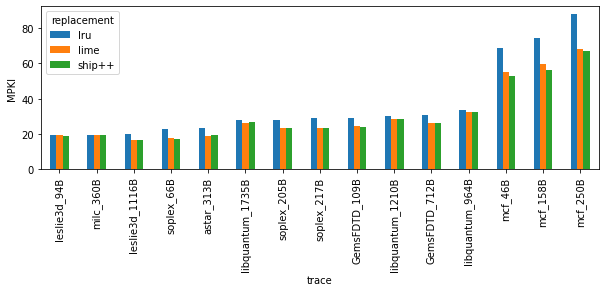

In [157]:
plot_mpki_comparsion( data_cfg1 )
save_fig( 'base_mpki_cfg1' )

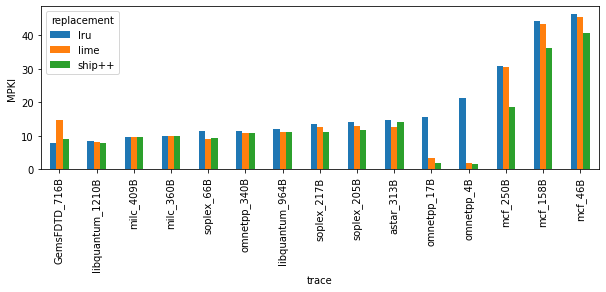

In [158]:
plot_mpki_comparsion( data_cfg2 )
save_fig( 'base_mpki_cfg2' )

In [119]:
def plot_speedup_comparsion( df ):
    df = df.pivot_table( index = 'trace', columns = 'replacement', values = 'speedup' ).sort_values( axis = 0, by = 'ship++' )[['lru', 'lime', 'ship++']]
    df.iloc[-15:].plot.bar( ylabel = 'Speedup', figsize = ( 10, 3 ), ylim = ( 0.5, 1.5 ) )

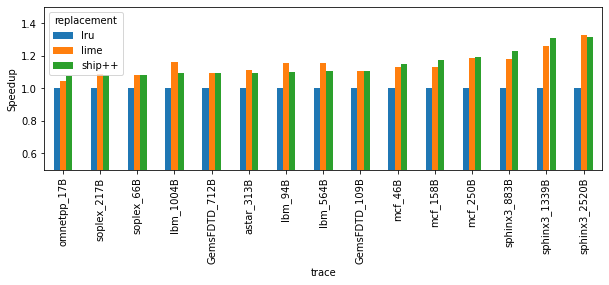

In [159]:
plot_speedup_comparsion( data_cfg1 )
save_fig( 'base_speedup_cfg1' )

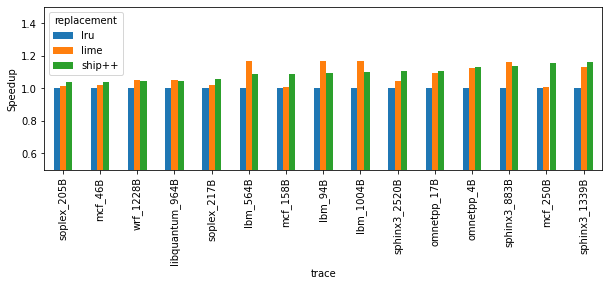

In [160]:
plot_speedup_comparsion( data_cfg2 )
save_fig( 'base_speedup_cfg2' )

In [170]:
def plot_mpki_comparsion_leaders( df ):
    df = df.pivot_table( index = 'trace', columns = 'replacement', values = 'mpki' ).sort_values( axis = 0, by = 'ship++' )[[*[f'ship++_leaders_{i}' for i in [16, 32]], 'ship++', *[f'ship++_leaders_{i}' for i in [128, 256]]]]
    df.set_axis( [ 2 ** i for i in range( 5, 10 ) ], axis = 1, inplace = True )
    df.iloc[-15:].plot.bar( ylabel = 'MPKI', figsize = ( 10, 3 ) )

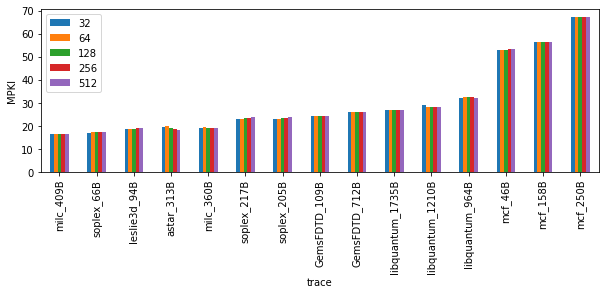

In [171]:
plot_mpki_comparsion_leaders( data_cfg1 )
save_fig( 'leaders_mpki_cfg1' )

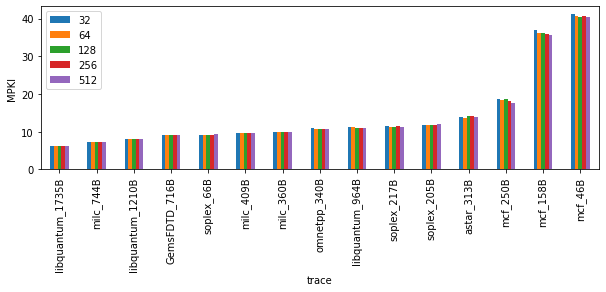

In [172]:
plot_mpki_comparsion_leaders( data_cfg2 )
save_fig( 'leaders_mpki_cfg2' )

In [173]:
def plot_mpki_comparsion_shctr( df ):
    df = df.pivot_table( index = 'trace', columns = 'replacement', values = 'mpki' ).sort_values( axis = 0, by = 'ship++' )[[*[f'ship++_shctr_{i}' for i in [5, 6]], 'ship++', *[f'ship++_shctr_{i}' for i in [8, 9]]]]
    df.set_axis( [ i for i in range( 5, 10 ) ], axis = 1, inplace = True )
    df.iloc[-15:].plot.bar( ylabel = 'MPKI', figsize = ( 10, 3 ) )

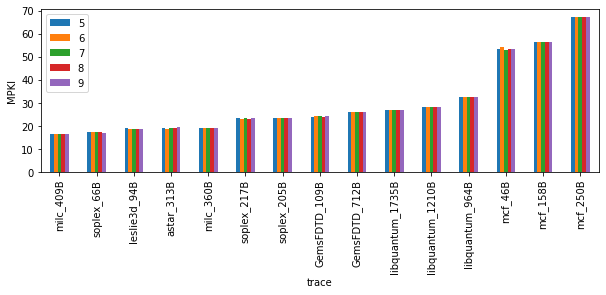

In [174]:
plot_mpki_comparsion_shctr( data_cfg1 )
save_fig( 'shctr_mpki_cfg1' )

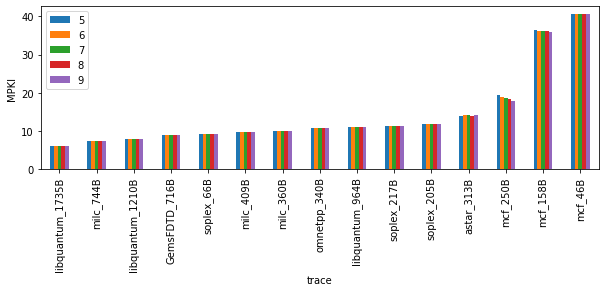

In [175]:
plot_mpki_comparsion_shctr( data_cfg2 )
save_fig( 'shctr_mpki_cfg2' )

In [138]:
ship_traces_cfg1 = data_cfg1[( data_cfg1['replacement'] == 'lru' ) & ( data_cfg1['mpki'] >= 0.5 )]['trace'].unique()
ship_traces_cfg2 = data_cfg2[( data_cfg2['replacement'] == 'lru' ) & ( data_cfg2['mpki'] >= 0.5 )]['trace']

In [154]:
data_cfg1[( data_cfg1['replacement'] == 'lru' )]['mpki']

510     6.308320
511     0.211770
512     8.061780
513     0.137580
514    30.949029
515     3.053960
516     7.634840
517    28.864610
518     7.973450
519     9.961410
520    74.384079
521     1.878810
522    14.416110
523    19.276840
524    29.324270
525    33.903810
526    30.067729
527     6.551270
528     0.729060
529    14.243910
530     9.859110
531     8.433700
532     5.844060
533     0.163440
534     0.440730
535    17.572630
536     1.568070
537     6.307040
538    27.894010
539     6.121680
540     0.186380
541    16.806449
542    19.904130
543    11.257920
544    11.961520
545    23.201850
546     0.641800
547    68.550369
548     3.123940
549    28.189629
550     0.553580
551    19.559149
552     2.328930
553    87.921110
554     8.090300
555    22.734779
556     0.017060
557     0.769630
558     2.245110
559     1.136740
560    13.211930
Name: mpki, dtype: float64

In [139]:
ship_traces_cfg1

array(['cactusADM_734B', 'lbm_1004B', 'GemsFDTD_712B', 'zeusmp_100B',
       'lbm_94B', 'soplex_217B', 'sphinx3_2520B', 'sphinx3_1339B',
       'mcf_158B', 'zeusmp_300B', 'omnetpp_340B', 'leslie3d_94B',
       'GemsFDTD_109B', 'libquantum_964B', 'libquantum_1210B',
       'omnetpp_4B', 'astar_163B', 'GemsFDTD_716B', 'omnetpp_17B',
       'lbm_564B', 'wrf_1650B', 'gcc_56B', 'leslie3d_1186B', 'bzip2_281B',
       'cactusADM_1039B', 'libquantum_1735B', 'cactusADM_1495B',
       'milc_409B', 'leslie3d_1116B', 'gcc_13B', 'sphinx3_883B',
       'astar_313B', 'bzip2_183B', 'mcf_46B', 'zeusmp_600B',
       'soplex_205B', 'calculix_3812B', 'milc_360B', 'astar_23B',
       'mcf_250B', 'wrf_1228B', 'soplex_66B', 'wrf_1212B', 'bzip2_259B',
       'calculix_2655B', 'milc_744B'], dtype=object)

In [155]:
from scipy.stats import gmean

df = data_cfg1.pivot_table( index = 'trace', columns = 'replacement', values = 'speedup' )
df.loc['gmean'] = gmean( df, axis = 0 )
df

replacement,lime,lru,ship++,ship++_leaders_128,ship++_leaders_16,ship++_leaders_256,ship++_leaders_32,ship++_shctr_5,ship++_shctr_6,ship++_shctr_8,ship++_shctr_9
trace,,,,,,,,,,,
GemsFDTD_109B,1.103204,1.0,1.104590,1.102675,1.099454,1.102914,1.103266,1.104668,1.104635,1.105080,1.104154
GemsFDTD_712B,1.092927,1.0,1.095421,1.094765,1.096099,1.095071,1.094715,1.095944,1.096436,1.095806,1.094942
GemsFDTD_716B,0.990366,1.0,0.992011,0.992004,0.992947,0.991093,0.992972,0.990017,0.991230,0.992960,0.993985
astar_163B,1.000903,1.0,0.991042,0.997141,0.990104,0.991199,0.989838,0.989874,0.991808,0.989872,0.988370
astar_23B,0.984915,1.0,0.999290,0.999201,0.998961,0.999220,0.999182,0.999144,0.999138,0.999249,0.999406
astar_313B,1.112872,1.0,1.095633,1.112486,1.085964,1.106220,1.083143,1.105491,1.107343,1.103846,1.094322
bzip2_183B,1.001799,1.0,1.003146,1.003039,1.002534,1.003022,1.002957,1.002926,1.002851,1.003114,1.002997
bzip2_259B,1.012908,1.0,1.019254,1.019383,1.014698,1.019768,1.020160,1.021146,1.019149,1.019743,1.020041
bzip2_281B,1.002761,1.0,1.013854,1.013310,1.012606,1.013119,1.013868,1.014991,1.013644,1.014864,1.015895


In [156]:
from scipy.stats import gmean

df = data_cfg1.pivot_table( index = 'trace', columns = 'replacement', values = 'ipc' )
df.loc['gmean'] = gmean( df, axis = 0 )
df

replacement,lime,lru,ship++,ship++_leaders_128,ship++_leaders_16,ship++_leaders_256,ship++_leaders_32,ship++_shctr_5,ship++_shctr_6,ship++_shctr_8,ship++_shctr_9
trace,,,,,,,,,,,
GemsFDTD_109B,0.369261,0.334717,0.369725,0.369084,0.368006,0.369164,0.369282,0.369751,0.369740,0.369889,0.369579
GemsFDTD_712B,0.346602,0.317132,0.347393,0.347185,0.347608,0.347282,0.347169,0.347559,0.347715,0.347515,0.347241
GemsFDTD_716B,0.396822,0.400682,0.397481,0.397478,0.397856,0.397113,0.397866,0.396682,0.397168,0.397861,0.398272
astar_163B,0.496409,0.495961,0.491518,0.494543,0.491053,0.491596,0.490921,0.490939,0.491898,0.490938,0.490193
astar_23B,0.311958,0.316736,0.316511,0.316483,0.316407,0.316489,0.316477,0.316465,0.316463,0.316498,0.316548
astar_313B,0.129821,0.116654,0.127810,0.129776,0.126682,0.129045,0.126353,0.128960,0.129176,0.128768,0.127657
bzip2_183B,0.746114,0.744774,0.747117,0.747037,0.746661,0.747025,0.746976,0.746953,0.746897,0.747093,0.747006
bzip2_259B,0.809725,0.799406,0.814798,0.814901,0.811156,0.815209,0.815522,0.816310,0.814714,0.815189,0.815427
bzip2_281B,0.820139,0.817881,0.829212,0.828767,0.828191,0.828611,0.829223,0.830142,0.829040,0.830038,0.830881
